<a href="https://colab.research.google.com/github/IsidoraJevremovic/osnovi-astronomije/blob/main/19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install astroquery
from astroquery.sdss import SDSS

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.8/910.8 kB 31.7 MB/s eta 0:00:00


H0: 76.81 km/s/Mpc
Starost svemira: 12.73 milijardi godina


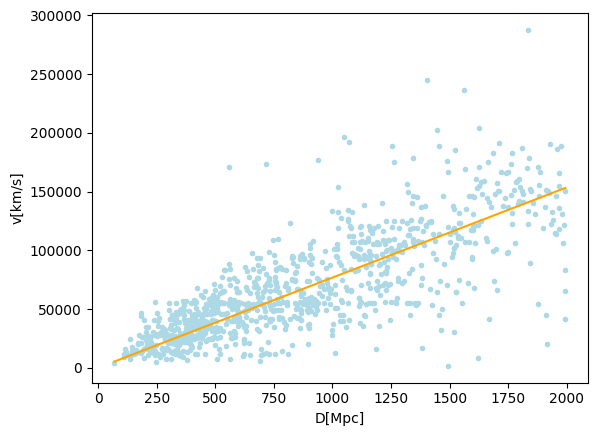

In [2]:
query = """
    SELECT TOP 1000
    g.objID, s.z, g.g
    FROM Galaxy as g
    JOIN SpecObj  as s
    ON g.objID = s.bestObjID
    WHERE
    s.z > 0.001 and s.z < 1
    AND g.g > 0 and g.g < 22
   """

results = SDSS.query_sql(query)


import numpy as np

M = -19.5
c = 299792458

rastojanje = []
brzina = []

for result in results:
  rastojanje.append(pow(10, 1/5 * (5 - M + result[2])) / 10 ** 6)
  brzina.append(c * result[1] / 1000)

rastojanje = np.array(rastojanje)
brzina = np.array(brzina)

import matplotlib.pyplot as plt
import scipy

def linearni_model(H0, d):
  return H0 * d

opt, cov = scipy.optimize.curve_fit(linearni_model, rastojanje, brzina)
H0_opt = opt[0]

print(f"H0: {H0_opt:.2f} km/s/Mpc")


H0_opt_s = H0_opt / (3.085677581e19)
starost_svemira_s = 1 / H0_opt_s
starost_svemira_god = starost_svemira_s / (60 * 60 * 24 * 365.25 * 1000000000)

print(f"Starost svemira: {starost_svemira_god:.2f} milijardi godina")

plt.figure()
plt.xlabel('D[Mpc]')
plt.ylabel('v[km/s]')
plt.scatter(rastojanje, brzina, color = 'lightblue', marker='.')
d_fit = np.linspace(min(rastojanje), max(rastojanje), 100)
v_fit = linearni_model(d_fit, H0_opt)
plt.plot(d_fit, v_fit, color='orange')
plt.show()
